In [24]:
import matplotlib.pyplot as plt
import numpy as np
import tsplib95 # allows easy reading of tsplib files


We expect the results file to have:
```
TSP_FILENAME as a string
SOLUTION_ARRAY as a sequence of indeces
COST as an int
```

if any new values need to be added, we'll change the specs

TSP FILE:  ./data/berlin52.tsp
SOLUTION SEQUENCE:  [42, 14, 4, 23, 47, 37, 39, 36, 38, 35, 34, 33, 43, 45, 15, 49, 19, 22, 30, 17, 21, 0, 48, 31, 44, 18, 40, 7, 9, 8, 2, 16, 20, 29, 28, 24, 3, 5, 11, 27, 26, 25, 46, 12, 13, 51, 10, 50, 32, 41, 6, 1]
COST:  10094.394437
berlin52
52 locations in Berlin (Groetschel)
TSP
{'NAME': <StringField('NAME')>, 'COMMENT': <StringField('COMMENT')>, 'TYPE': <StringField('TYPE')>, 'DIMENSION': <IntegerField('DIMENSION')>, 'CAPACITY': <IntegerField('CAPACITY')>, 'NODE_COORD_TYPE': <StringField('NODE_COORD_TYPE')>, 'EDGE_WEIGHT_TYPE': <StringField('EDGE_WEIGHT_TYPE')>, 'DISPLAY_DATA_TYPE': <StringField('DISPLAY_DATA_TYPE')>, 'EDGE_WEIGHT_FORMAT': <StringField('EDGE_WEIGHT_FORMAT')>, 'EDGE_DATA_FORMAT': <StringField('EDGE_DATA_FORMAT')>, 'NODE_COORD_SECTION': <IndexedCoordinatesField('NODE_COORD_SECTION')>, 'EDGE_DATA_SECTION': <EdgeDataField('EDGE_DATA_SECTION')>, 'EDGE_WEIGHT_SECTION': <MatrixField('EDGE_WEIGHT_SECTION')>, 'DISPLAY_DATA_SECTION': <Inde

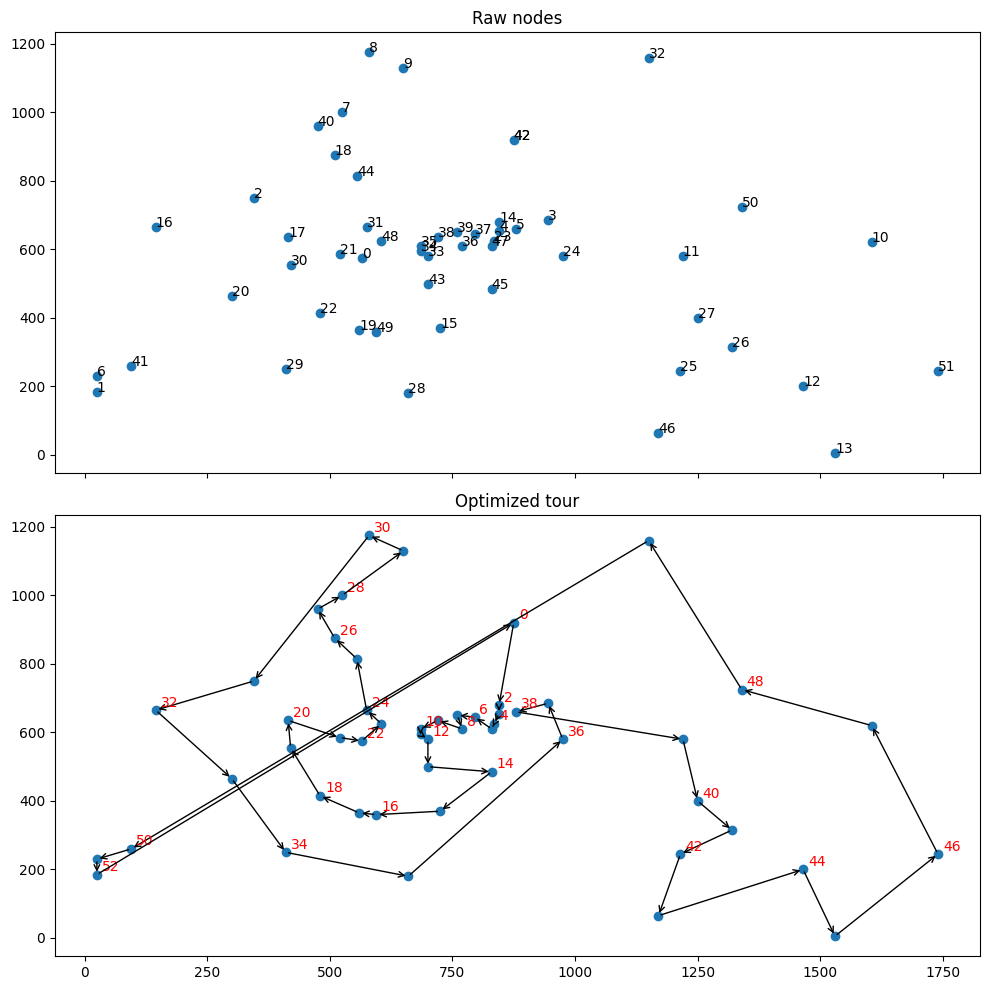

In [29]:
filename = "../results/solution.txt"
x = loadfile(filename)
arrow_plot(*x)

TSP FILE:  ./data/berlin52.tsp
SOLUTION SEQUENCE:  [42, 14, 4, 23, 47, 37, 39, 36, 38, 35, 34, 33, 43, 45, 49, 49, 19, 22, 30, 17, 21, 0, 48, 31, 44, 18, 40, 7, 9, 8, 2, 16, 20, 29, 28, 24, 3, 5, 11, 27, 26, 25, 46, 12, 13, 51, 10, 50, 32, 41, 6, 1]
COST:  8373.589034
berlin52
52 locations in Berlin (Groetschel)
TSP
{'NAME': <StringField('NAME')>, 'COMMENT': <StringField('COMMENT')>, 'TYPE': <StringField('TYPE')>, 'DIMENSION': <IntegerField('DIMENSION')>, 'CAPACITY': <IntegerField('CAPACITY')>, 'NODE_COORD_TYPE': <StringField('NODE_COORD_TYPE')>, 'EDGE_WEIGHT_TYPE': <StringField('EDGE_WEIGHT_TYPE')>, 'DISPLAY_DATA_TYPE': <StringField('DISPLAY_DATA_TYPE')>, 'EDGE_WEIGHT_FORMAT': <StringField('EDGE_WEIGHT_FORMAT')>, 'EDGE_DATA_FORMAT': <StringField('EDGE_DATA_FORMAT')>, 'NODE_COORD_SECTION': <IndexedCoordinatesField('NODE_COORD_SECTION')>, 'EDGE_DATA_SECTION': <EdgeDataField('EDGE_DATA_SECTION')>, 'EDGE_WEIGHT_SECTION': <MatrixField('EDGE_WEIGHT_SECTION')>, 'DISPLAY_DATA_SECTION': <Index

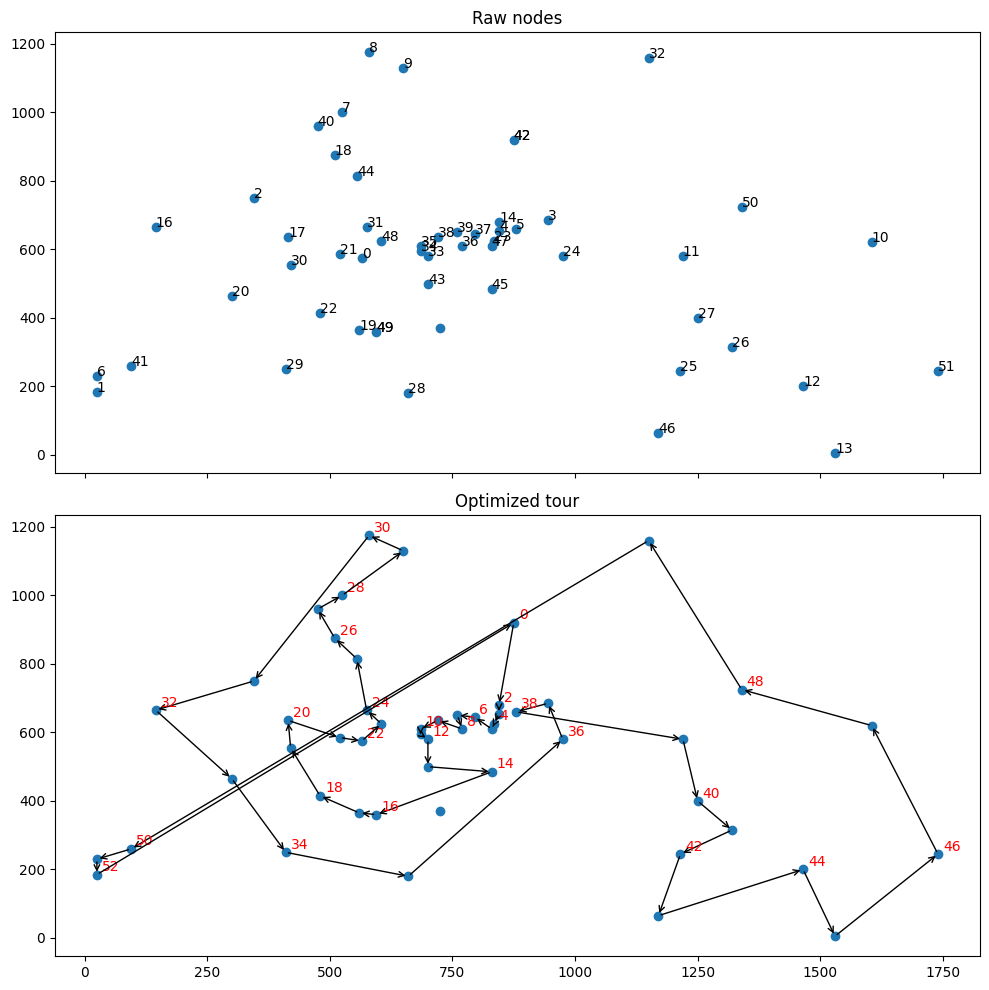

In [34]:
filename = "../results/tmp_sol.txt"
x = loadfile(filename)
arrow_plot(*x)


In [32]:
# read results file
def loadfile(filename):
    with open(filename) as results:
        text = results.readlines()
    tsp_file = text[0].strip()
    solution = list(map(int, str.split(text[1].strip(), " "))) # parse string as list of int
    cost = float(text[2].strip())
    print("TSP FILE: ", tsp_file)
    print("SOLUTION SEQUENCE: ", solution)
    print("COST: ", cost)
    # convert from worpsace folder to local folder
    problem = tsplib95.load("."+tsp_file)

    print(problem.name)
    print(problem.comment)
    print(problem.type)
    print(problem.fields_by_keyword)
    coordinates = np.array(list(problem.node_coords.values()))
    return (problem, coordinates, solution)

In [27]:
def uglu_color_plot(problem, coordinates, solution):
    fig, ax = plt.subplots(figsize=(10, 10))

    colormap = plt.cm.jet # colormap to define color cycle 
    colors = [colormap(i) for i in np.linspace(0, 1, problem.dimension)]

    for index in range(problem.dimension):
        x, y = coordinates[index]
        ax.scatter(x, y, c=colors[index]) # draw nodes

    for i in range(problem.dimension):
        sol_index = solution[i]
        x, y = coordinates[sol_index]
        next_index = solution[(i + 1) % problem.dimension]
        next_x, next_y = coordinates[next_index]
        ax.plot([x, next_x], [y, next_y], c=colors[i])




    ax.set_title(problem.name)

    fig.show()

In [28]:
def arrow_plot(problem, coordinates, solution):
    fig, ax = plt.subplots(2, sharex=True, sharey=True,
                        figsize=(10, 10))         # Prepare 2 plots
    ax[0].set_title('Raw nodes')
    ax[1].set_title('Optimized tour')
    ax[0].scatter(coordinates[:, 0], coordinates[:, 1])             # plot A
    ax[1].scatter(coordinates[:, 0], coordinates[:, 1])             # plot B
    start_node = solution[0]
    distance = 0.
    for i in range(problem.dimension + 1):
        start_pos = coordinates[start_node]
        # needed because of MIP-approach used for TSP
        next_node = solution[i % problem.dimension]
        end_pos = coordinates[next_node]
        #ax[1].annotate(text = str(start_node), xy = start_pos)
        ax[0].annotate(text=str(start_node), xy=start_pos)
        ax[1].text(*(start_pos + (10, 10)), i, color = "red")
        ax[1].annotate("",
                    xy=end_pos, xycoords='data',
                    xytext=start_pos, textcoords='data',
                    arrowprops=dict(arrowstyle="->",
                                    connectionstyle="arc3"))
        distance += np.linalg.norm(end_pos - start_pos)
        start_node = next_node

    textstr = "N nodes: %d\nTotal length: %.3f" % (problem.dimension, distance)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    #ax[1].text(0.05, 0.95, textstr, transform=ax[1].transAxes, fontsize=14,  # Textbox verticalalignment='top', bbox=props)

    plt.tight_layout()
    plt.show()
